In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('datamerge.csv',index_col=0)
df.head()

,district,area,year,rooms,value,floor,elevator,parking,warehouse,District_number,...,khanevar95,population95,population_man95,population_woman95,kambod_mazad85,masahat_sabz85,masahatsabz_of_mantaghe85,sarane_fazayesabz85,tarakom_nafar_darhektar,masahat_mantaghe
0,نیاوران,257,1390,3,25000000000,3,True,True,True,529,...,166881,487508,238693,248815,-760521,3799479,11,10,110.0,34610
1,نیاوران,127,1387,2,12500000000,4,True,True,True,529,...,166881,487508,238693,248815,-760521,3799479,11,10,110.0,34610
2,نیاوران,270,1401,3,65000000000,5,True,True,True,529,...,166881,487508,238693,248815,-760521,3799479,11,10,110.0,34610
3,نیاوران,182,1386,3,25500000000,5,True,True,True,529,...,166881,487508,238693,248815,-760521,3799479,11,10,110.0,34610
4,نیاوران,222,1397,3,27750000000,6,True,True,True,529,...,166881,487508,238693,248815,-760521,3799479,11,10,110.0,34610


In [3]:
X=df.loc[:,df.columns!='value'].values
Y=df.loc[:,'value'].values

In [4]:
from sklearn.preprocessing import OneHotEncoder
coding=OneHotEncoder()


In [5]:
transformed_district=coding.fit_transform(df['district'].to_numpy().reshape(-1,1)).toarray()


In [6]:
X=np.delete(X,0,1)

In [7]:
X=np.concatenate((X,transformed_district),axis=1)

In [8]:

from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=42,stratify=df['year'])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_label=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
Y_train_scaled=scaler_label.fit_transform(Y_train.reshape(-1,1))


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
parameters = {'kernel':['rbf'], 'C':[1, 10]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train_scaled,Y_train_scaled)

/Users/arianzarifian/Downloads/Ml-Project-2/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arianzarifian/Downloads/Ml-Project-2/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arianzarifian/Downloads/Ml-Project-2/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arianzarifian/Downloads/Ml-Project-2/env/lib/python3.10/site-packages/sklearn/utils/validatio

GridSearchCV(estimator=SVR(), param_grid={'C': [1, 10], 'kernel': ['rbf']})

In [11]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
regr=make_pipeline(SVR(C=10))

In [14]:
regr.fit(X_train_scaled,Y_train_scaled)

/Users/arianzarifian/Downloads/Ml-Project-2/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('svr', SVR(C=10))])

In [15]:

Y_test_scaled=scaler_label.fit_transform(Y_test.reshape(-1,1))


In [16]:
X_test_scaled=scaler.fit_transform(X_test)

In [17]:
Y_predict=regr.predict(X_test_scaled)

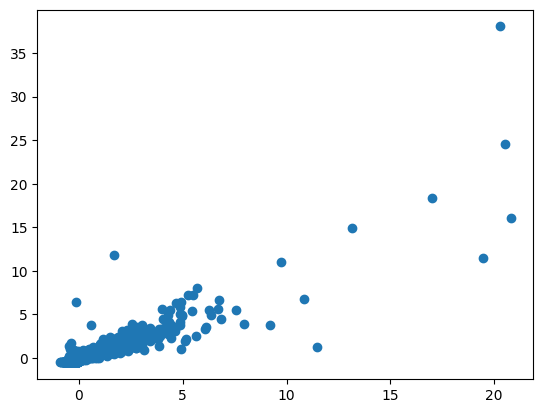

In [18]:
plt.scatter(Y_predict,Y_test_scaled)

In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test_scaled,Y_predict)

0.8058249579666353

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test_scaled,Y_predict)

0.1515748407811902

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test_scaled,Y_predict)

0.19417504203336466

In [22]:
predictions = scaler_label.inverse_transform(Y_predict.reshape(-1,1))

In [23]:
import math

In [24]:
math.sqrt(mean_squared_error(Y_test, predictions)) / df["value"].mean()

0.8975629086597919